***DSCI 100 Final Report (002 Group 12)***
by Kenneth Ahn, Alex Ronczewski, Ryan Zhang, Natalie Viegas


In this report, a dataset based on UBC’s minecraft server “Plaicraft” was created and distributed to DSCI 100 students to answer questions regarding the results of the dataset. The broad question we decided to answer was "What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?". Specifying our broad question further, we decided on our report question to be "Can experience level predict whether a player subscribes to a game-related newsletter in the "Players" dataset?". Delving deeper into the “Players” dataset, there are 7 variables, 196 observations and a multitude of columns describing different aspects of the data acquired from “Plaicraft”. These variables include, 

***Continue intro above***

Question (Add more)

**Can experience level predict whether a player subscribes to a game-related newsletter in the "Players" dataset?"**

Methods & Results (Add more)
describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.


In [1]:
#Load the necessary libraries and set the matrix max rows to 6. 
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
#Load the dataset into R using the raw file from Github
players <- read_csv("https://raw.githubusercontent.com/Alexr951/DSCI100Project/refs/heads/main/data/players.csv")
players

sessions <- read_csv("https://raw.githubusercontent.com/Alexr951/DSCI100Project/refs/heads/main/data/sessions.csv")
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


#### Table 1: Variable Descriptions for the Players Dataset

This dataset has 196 observations and 7 Variables. 

| Variable Name | Variable Type | Description                                                         | 
|---------------|---------------|---------------------------------------------------------------------|
|experience     |character      |Player's experience level (Beginner, Amateur, Regular, Veteran, Pro) |
|subscribe      | logical       | Whether the player has subscribed to the newsletter (TRUE or FALSE) |
|hashedEmail    | character     |   Player's identifier                                               |
|played_hours   |  double       | Player's total number of hours played                               |
|name           | character     |   Player's name                                                     |
|gender         |  character    |   Player's gender (Male or Female)                                  |
|Age            |    double     |    Player's age                                                     |

#### Table 2: Variable Descriptions for the Sessions Dataset

This dataste has 1535 Observations and 5 variables

| Variable Name      | Variable Type | Description                                                         | 
|--------------------|---------------|---------------------------------------------------------------------|
|hashedEmail         | character     |   Player's identifier                                               |
|start_time          |  character    |   Character string representing start time of players sessions      |
|end_time            | character     |   Character string representing end time of players sessions        |
|original_start_time |  double       |   Numerical Value representing player start time                    |
|original_end_time   |    double     |   Numerical Value representing player end time                      |

In [ ]:
#sumamry statistics for the players dataset
#summary(players)
#sumamry statistics of sessions dataset
#summary(sessions)

#We can add this if we want, but for me concrete summary stats check below

subscribed_players,not_subscribed_players
<int>,<int>
144,52


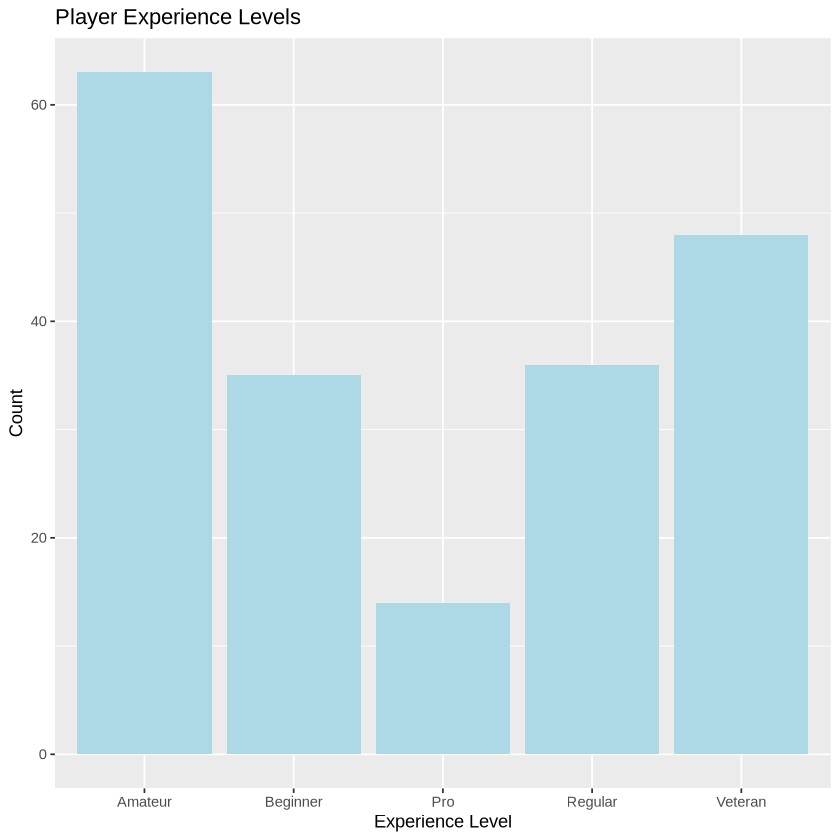

In [3]:
#More specific summary stats for our question

#Distribution of experience levels of players
experience_summary <- players |> 
  count(experience, name = "count")
#experience_summary

experience_plot <- ggplot(players, aes(x = experience)) +
  geom_bar(fill = "lightblue") +
  labs(
    title = "Player Experience Levels",
    x = "Experience Level",
    y = "Count") 

experience_plot

#Distribution of subscriptions for our question levels of players

subscription_summary <- players |> 
  summarize(subscribed_players = sum(subscribe, na.rm = TRUE),
    not_subscribed_players = sum(!subscribe, na.rm = TRUE))

subscription_summary


**Tidying the data**

Possible issues

`For players.csv`
- Remove NA data from age. 
- Make sure that the data is in a tidy format
- Convert Gender and Experience to a factor variable
- Change experience to a qualitative variable from 1-5

As for `sessions.csv`
- Check for missing values/duplicates.
- Make sure that the data is in a tidy format
- start_time and end_time could be converted to a different date time format with lubridate (might be too much for intial project proposal) and then changing original_start_timeand original_end_time to be consistenct. 

In [9]:
#Cleaning for players.csv
players_clean <- players |> 
  filter(!is.na(Age)) |>  
  mutate(
    experience = case_when(
      experience == "Beginner" ~ 1,
      experience == "Amateur" ~ 2,
      experience == "Regular" ~ 3,
      experience == "Veteran" ~ 4,
      experience == "Pro" ~ 5) |> as.factor(),
    subscribe = factor(subscribe, levels = c(TRUE, FALSE))) |> 
  filter(!is.na(experience))  
players_clean

#Make a new datafrome to find duplicates 
duplicates <- sessions |> 
  group_by(hashedEmail, start_time, end_time) |> 
  filter(n() > 1)
#duplicates

#Make a new datafrome to find duplicates 
missing_values <- sessions |>
  filter(is.na(start_time), is.na(end_time), is.na(hashedEmail), is.na(original_start_time), is.na(original_end_time))
#missing_values

#check if start time is before endtime 
sessions <- sessions |> 
  filter(start_time < end_time)
sessions 

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
5,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
4,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
4,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
4,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
2,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
2,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


We found no duplicates/missing values in the data and the  five rows where start_time < end_time which have been removed. We can continue with our analysis. 

**Main Analysis Section:**

Research question: "Can experience level predict whether a player subscribes to a game-related newsletter?" We have a binary classification based on a predictive variable, for this analysis we will use the K-Nearest Neighbours Technique. We choose this as opposed to other techniques from this course like linear regressions because in the dataset we have 194 observations which is quite small and we are predicting a binary outcome (yes/no) as opposed to something continious like increase in price. First let's look at the relationship between experience levels and amount subscribed in a bar plot. 

`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


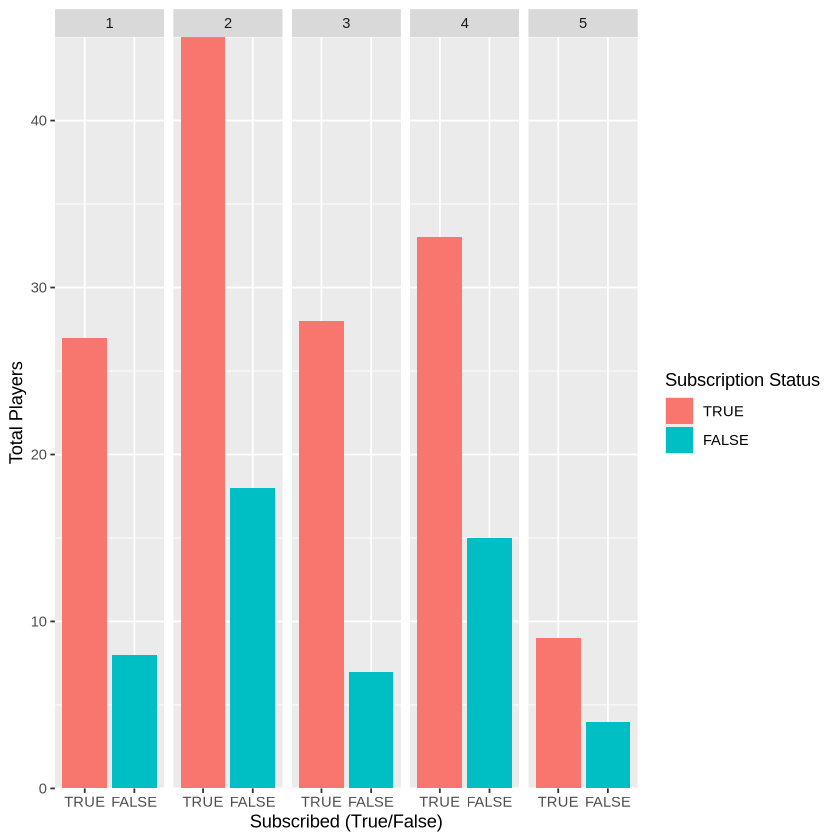

In [25]:
experience_subscribed_amount <- players_clean |>
    group_by(experience, subscribe) |>
    summarise(total = n())

experience_subscribed_plot <- experience_subscribed_amount |>
    ggplot(aes(x = subscribe, y = total, fill = subscribe)) +
    geom_bar(stat = "identity") +
    facet_grid(~experience) +  
    xlab("Subscribed (True/False)") +
    ylab("Total Players") +
    labs(fill = "Subscription Status") +
    scale_y_continuous(expand = c(0, 0)) +
    theme(text = element_text(size = 11))
experience_subscribed_plot

As for the main analysis using K-NN as our method.

In [90]:
#Old question 
logistic_model <- glm(subscribe ~ experience, data = players_clean, family = binomial)
summary(logistic_model)

#Delete this for the actual final notebook just wanted to show the old question. 

#Looking at output it is not significant for the experience levels anyway so it would be a boring analysis. 


Call:
glm(formula = subscribe ~ experience, family = binomial, data = players_clean)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -1.2164     0.4025  -3.022  0.00251 **
experience2   0.3001     0.4897   0.613  0.53999   
experience3  -0.1699     0.5836  -0.291  0.77096   
experience4   0.4279     0.5089   0.841  0.40042   
experience5   0.4055     0.7233   0.561  0.57508   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 225.54  on 193  degrees of freedom
Residual deviance: 223.71  on 189  degrees of freedom
AIC: 233.71

Number of Fisher Scoring iterations: 4


**Analysis**

Note: Can delete all of this for the final submission and just keep the tuning section if we want, this is more to show where the info came from. 

First lets look at the regression with n = 3 as that was the inclass standard and see the accuracy, precision and recall to answer if we can predict subscription with Played_hours and experience level. 

In [58]:
#Working New question which KNN can actually be used on Played_hours and experience level
players_split <- initial_split(players_clean, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

players_recipe <- recipe(subscribe ~ experience + played_hours, data = players_train) |>
  step_dummy(experience) |>          # Convert factor to dummy variables
  step_normalize(all_predictors())  # Normalize both dummy vars and played_hours

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = players_train)

players_test_predictions <- predict(knn_fit, players_test) |>
  bind_cols(players_test)
#players_test_predictions


In [61]:
#First, we will examine accuracy
players_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.4489796


In [72]:
#Now precision
players_test_predictions |> pull(subscribe) |> levels()

players_test_predictions |>
  precision(truth = subscribe, estimate = .pred_class, event_level = "first") #Here first is predicting 'true' ie if the person is subscribed

[1] "TRUE"  "FALSE"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.6666667


In [73]:
#Finally recall
players_test_predictions |>
  recall(truth = subscribe, estimate = .pred_class, event_level = "first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.5


In [74]:
#Make a matrix to show the predictions
confusion_matrix <- players_test_predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)
confusion_matrix

          Truth
Prediction TRUE FALSE
     TRUE    18     9
     FALSE   18     4

**Results**

Accuracy is 0.4489796, Precision is 0.6666667, Recall is 0.5

So not great let's improve this with tuning the classifer with cross validation 

In [55]:
#Improve this accuracy with a different K
set.seed(12)

# Split data into training/test sets
players_split <- initial_split(players_train, prop = 0.75, strata = subscribe)
players_subtrain <- training(players_split)
players_validation <- testing(players_split)

# Create preprocessing recipe
players_recipe <- recipe(subscribe ~ experience + played_hours, data = players_subtrain) |>
  step_dummy(experience) |>          # Convert factor to dummy variables
  step_normalize(all_predictors())  # Normalize both dummy vars and played_hours

# Specify KNN model with tuning
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

#fit the knn model (reusing old model)
knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = players_subtrain)

# get predictions on the validation data
validation_predicted <- predict(knn_fit, players_validation) |>
  bind_cols(players_validation)

# Find Accuracy
accuracy <- validation_predicted |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()

accuracy

Warning message:
“tune samples were requested but there were 108 rows in the data. 103 will be used.”


[1] 0.7297297

In [77]:
players_vfold <- vfold_cv(players_train, v = 10, strata = subscribe)

vfold_metrics <- workflow() |>
                  add_recipe(players_recipe) |>
                  add_model(knn_spec) |>
                  fit_resamples(resamples = players_vfold) |>
                  collect_metrics()

#vfold_metrics

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.4775092,10,0.0625547,Preprocessor1_Model1
roc_auc,binary,0.5381818,10,0.0771105,Preprocessor1_Model1


In [78]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_results <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = players_vfold, grid = k_vals) |>
  collect_metrics()

accuracies <- knn_results |>
  filter(.metric == "accuracy")

#accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4974359,10,0.06029452,Preprocessor1_Model01
6,accuracy,binary,0.5679853,10,0.06202639,Preprocessor1_Model02
11,accuracy,binary,0.6575824,10,0.03993327,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
86,accuracy,binary,0.7312088,10,0.005090213,Preprocessor1_Model18
91,accuracy,binary,0.7312088,10,0.005090213,Preprocessor1_Model19
96,accuracy,binary,0.7312088,10,0.005090213,Preprocessor1_Model20


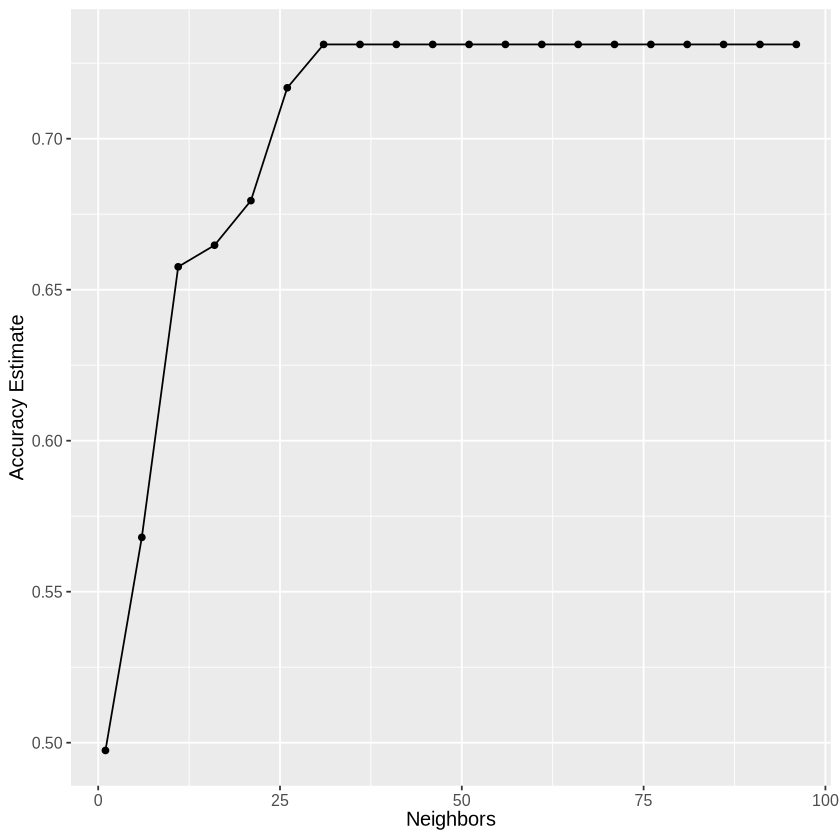

In [88]:
#To fill the visualization component of the assignment (IDK what other visualization to do) 
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))

accuracy_vs_k

In [81]:
#Find our best K
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 31

In [82]:
players_recipe <- recipe(subscribe ~ experience + played_hours, data = players_train) |>
  step_dummy(experience) |>          # Convert factor to dummy variables
  step_normalize(all_predictors())  # Normalize both dummy vars and played_hours

# Specify KNN model with tuning
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |> # k = 31
  set_engine("kknn") |>
  set_mode("classification")

#fit the knn model (we can reuse the old knn_spec model from before)
knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = players_train)

players_test_predictions <- predict(knn_fit, players_test) |>
  bind_cols(players_test)

In [83]:
#Find accuracy
players_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7346939


In [85]:
#Find prediction 
players_test_predictions |>
    precision(truth = subscribe, estimate = .pred_class, event_level="first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7346939


In [86]:
#Find recall 
players_test_predictions |>
    recall(truth = subscribe, estimate = .pred_class, event_level="first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,1


In [87]:
confusion_matrix <- players_test_predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)
confusion_matrix

          Truth
Prediction TRUE FALSE
     TRUE    36    13
     FALSE    0     0

**Second Results**

We have improved our predictive power by a lot. Before it was Accuracy at 0.4489796, Precision at 0.6666667, and Recall at 0.5 and now it is Accuracy at 0.7346939, Precision at 0.7346939, and Recall at 1. 